In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array

PROCESSED_DATA_DIR = "../Processed"
IMAGE_SIZE = (128, 128)
SKIN_TONE_CLASSES = ["White", "Brown", "Black"]

YCrCb_min = np.array([0, 133, 77], np.uint8)
YCrCb_max = np.array([255, 173, 127], np.uint8)

HSV_min = np.array([0, 40, 50], np.uint8)
HSV_max = np.array([50, 255, 255], np.uint8)


X_train shape: (960, 128, 128, 3)
y_train shape: (960, 3)


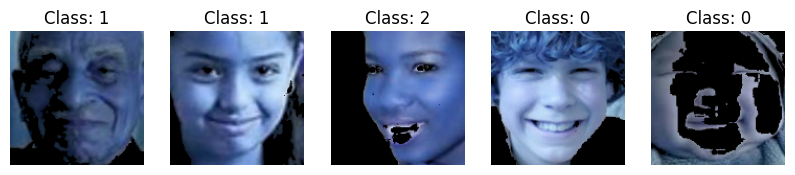

In [ ]:
X_train = np.load(f"{PROCESSED_DATA_DIR}/X_train.npy")
y_train = np.load(f"{PROCESSED_DATA_DIR}/y_train.npy")
X_val = np.load(f"{PROCESSED_DATA_DIR}/X_val.npy")
y_val = np.load(f"{PROCESSED_DATA_DIR}/y_val.npy")
X_test = np.load(f"{PROCESSED_DATA_DIR}/X_test.npy")
y_test = np.load(f"{PROCESSED_DATA_DIR}/y_test.npy")

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i])
    plt.axis("off")
    plt.title(f"Class: {np.argmax(y_train[i])}")
plt.show()


In [ ]:
num_classes = 3

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\ACER\anaconda3\envs\patten_recognition\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)

model.save("../model/skin_tone_cnn.h5")
print("Model saved successfully!")


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.3333 - loss: 1.3528 - val_accuracy: 0.4208 - val_loss: 0.9785
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.4688 - loss: 0.9926 - val_accuracy: 0.6417 - val_loss: 0.7864
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.6332 - loss: 0.7966 - val_accuracy: 0.7333 - val_loss: 0.6805
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.7126 - loss: 0.7052 - val_accuracy: 0.7542 - val_loss: 0.6130
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.7452 - loss: 0.6112 - val_accuracy: 0.7500 - val_loss: 0.5953
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7381 - loss: 0.5826 - val_accuracy: 0.7500 - val_loss: 0.5838
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.8089 - loss: 0.4879 - val_accuracy: 0.7625 - val_loss: 0.6185
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.8164 - loss: 0.4534 - val_accuracy: 0.7

Model saved successfully!


In [6]:
model = tf.keras.models.load_model("../model/skin_tone_cnn.h5")

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy: {test_acc * 100:.2f}%")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7845 - loss: 0.8996
Accuracy: 77.33%


In [30]:
def detect_skin(image):
    image_YCrCb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    image_HSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    mask_YCrCb = cv2.inRange(image_YCrCb, YCrCb_min, YCrCb_max)
    mask_HSV = cv2.inRange(image_HSV, HSV_min, HSV_max)

    skin_mask = cv2.bitwise_and(mask_YCrCb, mask_HSV)

    skin = cv2.bitwise_and(image, image, mask=skin_mask)
    
    return skin

In [31]:
def predicted_class(img_path):
    img = cv2.imread(img_path)
    if img is not None:
        skin_image = detect_skin(img)
                
        skin_image = cv2.resize(skin_image, IMAGE_SIZE)

        skin_image = skin_image / 255.0

        prediction = model.predict(skin_image.reshape(1, 128, 128, 3))
        predicted_class = SKIN_TONE_CLASSES[np.argmax(prediction)]
        return predicted_class

def plot_image(img_path):
    plt.imshow(cv2.imread(img_path)[:, :, ::-1])  # Chuyển ảnh từ BGR sang RGB
    plt.title(f"Predicted Class: {predicted_class(img_path)}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


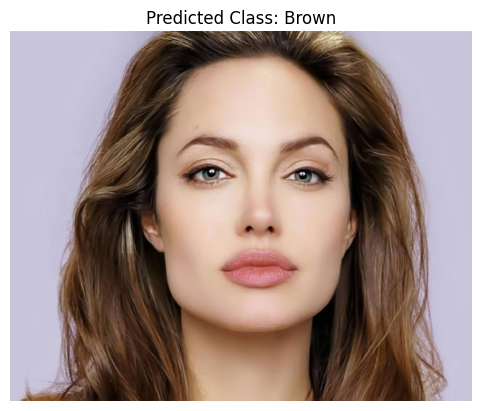

In [32]:
plot_image("../Dataset/test/test.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


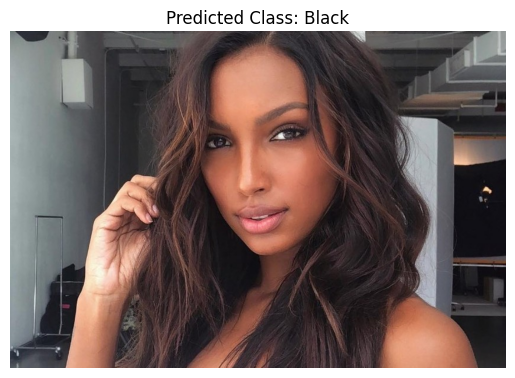

In [36]:
plot_image("../Dataset/test/test2.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


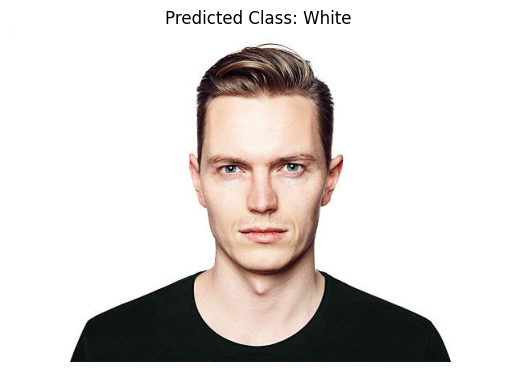

In [37]:
plot_image("../Dataset/test/test3.png")